In [1]:
import numpy as np
import os
import cv2 as cv
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import load_model

x = 96
y = 103

modelSynFP = load_model('synFP.h5')

real_data = "bing"

data = []
labels = []

# load the real data and their labels
photos_names = os.listdir(real_data)
for name in photos_names:
    data.append(cv.imread(os.path.join(real_data ,name) ,cv.IMREAD_GRAYSCALE))
    labels.append(1)

# resizeing all the data to 103X96
for i,image in enumerate(data):
    data[i] = cv.resize(image ,(x,y))

In [2]:
data = np.stack(data).reshape(-1 ,y ,x ,1)
labels = np.stack(labels).reshape(-1 ,1)

test_data_tensor = tf.convert_to_tensor(data, dtype=tf.float16)
test_labels_tensor = tf.convert_to_tensor(labels, dtype=tf.int16)

# converting to 3 channels
test_data_3 = tf.image.grayscale_to_rgb(test_data_tensor)

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSynFP.predict(test_data_3)

print("Balanced Accuracy: " +  str(balanced_accuracy_score(test_labels_tensor, np.rint(y_pred))))
print("Confusion Matrix: \n" +  str(confusion_matrix(test_labels_tensor, np.rint(y_pred))))
print(classification_report(test_labels_tensor, np.rint(y_pred)))

1/1 [==============================] - 6s 6s/step
Balanced Accuracy: 0.9333333333333333
Confusion Matrix: 
[[ 0  0]
 [ 2 28]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.93      0.97        30

    accuracy                           0.93        30
   macro avg       0.50      0.47      0.48        30
weighted avg       1.00      0.93      0.97        30



c:\Users\Alexandre\anaconda3\envs\tfnn\lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\Alexandre\anaconda3\envs\tfnn\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alexandre\anaconda3\envs\tfnn\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alexandre\anaconda3\envs\tfnn\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-def

11


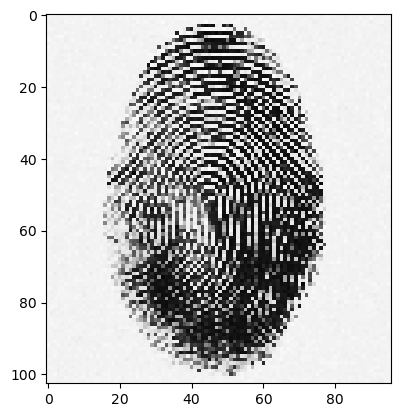

17


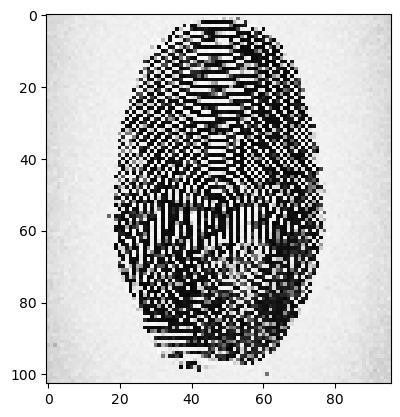

In [10]:
import matplotlib.pyplot as plt

for enum, value in enumerate(y_pred):
    if value < 0.5:
        print(enum)
        plt.imshow(data[enum], cmap='gray')
        plt.show()